<a href="https://colab.research.google.com/github/cmannnn/bank-promotional-campaigns/blob/main/Guided_Hackathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. Some important aspects of a marketing campaign are as follows: 

Segment of the Population: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. 

Distribution channel to reach the customer's place: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.) 

Promotional Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

You are leading the marketing analytics team for a banking institution. There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. 

#Can you help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?

Data Description
Train Set

#Train set contains the data to be used for model building. It has the true labels for whether the customer subscribed for term deposit (1) or not (0) 

Sample Submission:

Format for making the submission for predictions on the test set

id: Unique id for each call

term_deposit_subscribed: whether term deposit was subscribed post call. (1/0)

In [1]:
# imports
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

plt.style.use('fivethirtyeight')
%matplotlib inline

# constant figure size
figsize = [8, 10]

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir('/content/gdrive/MyDrive/Colabby Krabby Paddy')

In [4]:
!ls

 basic_computer_vision_p2.ipynb    intro_cnn_part3.ipynb
 build_image_classifier_p4.ipynb   intro_to_ML_pt1.ipynb
'Copy of 01_intro.ipynb'	  'Kivy Interview Question.ipynb'
'Copy of 02_production.ipynb'	   language_classification_deploy.ipynb
'Copy of 03_ethics.ipynb'	   language_classification.ipynb
'Copy of 04_mnist_basics.ipynb'    soccer_classification.ipynb
 fast.ai_ch_questions.ipynb	   Test_jPKyvmK.csv
 Guided_Hackathon_1.ipynb	   Train_eP48B9k.csv


In [5]:
# train and test datasets
train = pd.read_csv('Train_eP48B9k.csv')
test = pd.read_csv('Test_jPKyvmK.csv')

In [13]:
# setting independent and dependent variable
id_col, target_col = train['id'], train['term_deposit_subscribed'] 

In [ ]:
print(target_col.value_counts(normalize=True))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


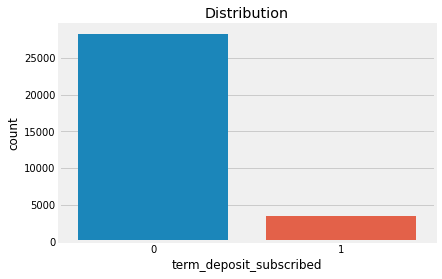

In [22]:
_ = sns.countplot(target_col)
plt.title('Distribution')
plt.show()

In [24]:
# shape of both datasets
print('The test set has', test.shape[0], 'samples and', test.shape[1], 'variables')
print('The train set has', train.shape[0], 'samples and', test.shape[1], 'variables')

The test set has 13564 samples and 17 variables
The train set has 31647 samples and 17 variables


#Train Set EDA

In [ ]:
# test set EDA
print(train.head())

In [ ]:
# test set columns
print(train.columns)

In [ ]:
# test set describe
print(train.describe())

# Remove Train Null Values

In [60]:
print(train.isnull().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64


In [ ]:
# fixing 619 train customer_age datapoints
print(train.customer_age.describe())
train.customer_age.fillna(train.customer_age.mean(), inplace=True)
print('The \'customer_age\' train column has', train.customer_age.isnull().sum(), 'null values')

In [ ]:
# fixing 150 'marital' train columns null values
print('The \'marital\' test column has', train.marital.nunique(), 'unique values')
print(train.marital.describe())

# filling NAN values with forward fill
train.marital.ffill(inplace=True)
print('The \'marital\' test column has', train.marital.isnull().sum(), 'null values')

In [ ]:
# fixing 399 'balance' train column null values
print('The train \'balance\' column has', train['balance'].nunique(), 'unique values')
print(train['balance'].describe())

# filling NAN values with mean
train['balance'].fillna(train['balance'].mean(), inplace=True)
print('The train \'balance\' column has', train['balance'].isnull().sum(), 'null values')

In [ ]:
# fixing 149 'personal_loan' train column null values
print('The \'personal_loan\' column has', train['personal_loan'].nunique(), 'unique values')
print(train['personal_loan'].value_counts(normalize=True))

# filling NAN values with back fill
train['personal_loan'].fillna(method='bfill', inplace=True)
print('The \personal_loan\' column has', train['personal_loan'].isnull().sum(), 'null values')

In [ ]:
# fixing 311 'last_contact_duration' train column null values
print('The \'last_contact_duration\' column has', train['last_contact_duration'].nunique(), 'unique values')
print(train['last_contact_duration'].describe())

#filling NAN values with std
train['last_contact_duration'].fillna(train['last_contact_duration'].mean(), inplace=True)
print('The \'last_contact_duration\' column has', train['last_contact_duration'].isnull().sum(), 'null values')

In [ ]:
# fixing 112 'num_contacts_in_campaign' train column null values

In [ ]:
# which columns in train set are uni/bi/multivariate/continuous?
print('The customer_age test set contains', train.customer_age.nunique(), 'number of unique values')

In [ ]:
# test 'customer_age' boxplot
train.boxplot(column=['customer_age'], notch=True, figsize=figsize)
plt.title('Customer Age')
plt.xlabel('')
plt.ylabel('age')
plt.show()

         id  customer_age  ... prev_campaign_outcome term_deposit_subscribed
0  id_43823          28.0  ...               unknown                       0
1  id_32289          34.0  ...                 other                       0
2  id_10523          46.0  ...               unknown                       0
3  id_43951          34.0  ...               unknown                       0
4  id_40992          41.0  ...               unknown                       0

[5 rows x 18 columns]
Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')
